In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('C:\\Users\\LHF\\Desktop\\数据库\\论文\\数据\\RDKit_10.csv',encoding='unicode_escape')
X = df.iloc[:, 1:223]
Y = df.iloc[:, 223:]
Y=Y['PCE']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
X

X_train's shape is (79, 222) ; y_train's shape is (79,)


,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,...,I,Br,CL,C60,BCP,PC60BM,PCBM,PC61BM,PEAI,ALD-SnO2
0,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
1,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
2,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
3,2.219,734.341,13.458,10.230,11.125,9.061,6.067,7.865,4.574,6.351,...,1.00,0.00,0.0,1,1,0,0,0,0,0
4,2.273,674.271,12.535,9.836,9.836,8.771,5.949,5.949,4.330,4.330,...,1.00,0.00,0.0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1.614,1842.863,29.380,23.673,23.673,20.448,13.322,13.322,9.784,9.784,...,0.84,0.16,0.0,1,1,0,0,0,0,0
95,1.411,2189.769,33.363,26.983,26.983,23.414,15.393,15.393,11.361,11.361,...,0.84,0.16,0.0,1,1,0,0,0,0,0
96,1.614,1842.863,29.380,23.673,23.673,20.448,13.322,13.322,9.784,9.784,...,0.84,0.16,0.0,1,1,0,0,0,0,0
97,1.411,2189.769,33.363,26.983,26.983,23.414,15.393,15.393,11.361,11.361,...,0.84,0.16,0.0,1,1,0,0,0,0,0


In [3]:
rf_regressor = RandomForestRegressor(
    n_estimators=400,      
    max_depth=10,
    min_samples_split=3,
    max_features=0.6,

    random_state=2
)


model = rf_regressor

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

In [5]:
rf_regressor.fit(X_train_stand, y_train)
y_train_hat = rf_regressor.predict(X_train_stand)
y_test_hat = rf_regressor.predict(X_test_stand)

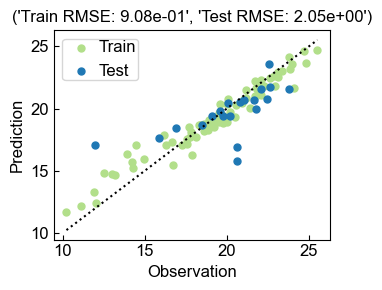

In [6]:
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
plt.tick_params(direction='in')
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
              'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()

In [7]:
np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))

0.9083272662981954

In [8]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_hat))

2.0466682538020735

In [9]:
metrics.mean_absolute_error(y_test, y_test_hat)

1.4426199303978224

In [10]:
import sklearn.metrics as metrics
from scipy.stats.stats import pearsonr

# Defining Metrics
def R2Score(X,Y):
    r2=metrics.r2_score(X,Y)
    return r2
#计算R²分数（R-squared score），也被称为决定系数，它衡量了回归模型对目标变量的方差解释比例。
#参数 X 和 Y 是两个数组，分别表示模型的预测值和实际目标值。

def PearsonCoefficient(X, Y):
    corr, _ = pearsonr(X,Y)
    return corr
#计算Pearson相关系数，衡量了两个变量之间的线性关系强度和方向。

In [11]:
PearsonCoefficient(y_test,y_test_hat)

0.6535266860251009

In [12]:
PearsonCoefficient(y_train,y_train_hat)

0.9726835644182736

In [13]:
R2Score(y_test,y_test_hat)

0.40305428033310164

In [14]:
R2Score(y_train,y_train_hat)

0.9278264484345818